# Dissertation Code
-----

In [1]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [2]:
# Loading Software Packages
# Basic Packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Packages
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Statistical Packages
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR
from pandas import DataFrame
from matplotlib import pyplot
import seaborn as sns

## Loading Datasets
----

In [3]:
# Reading in CSV files
gdp = pd.read_csv("C:/Users/maxsh/OneDrive/Desktop/University of Essex/Msc applied data science/Final Project/data/Figure_1__UK_GDP_is_estimated_to_have_shown_no_growth_in_April_2024,_but_grew_by_0.7%_in_the_three_months_to_April_2024_.csv")
unemployment = pd.read_csv("C:/Users/maxsh/OneDrive/Desktop/University of Essex/Msc applied data science/Final Project/data/statistic_id279898_unemployment-rate-of-the-uk-1971-2024.csv")
inflation = pd.read_csv("C:/Users/maxsh/OneDrive/Desktop/University of Essex/Msc applied data science/Final Project/data/statistic_id306648_inflation-rate-in-the-uk-1989-2024.csv")

# Checking Datasets for processing
gdp
unemployment
inflation

,"Figure 1: UK GDP is estimated to have shown no growth in April 2024, but grew by 0.7% in the three months to April 2024",Unnamed: 1
0,"Monthly index, January 2007 to April 2024, UK",NaN
1,NaN,NaN
2,Notes,NaN
3,Unit,"Index, 2019 = 100"
4,NaN,NaN
...,...,...
209,Dec-23,102
210,Jan-24,102.3
211,Feb-24,102.6
212,Mar-24,103


,Unemployment rate of the UK 1971-2024,Unnamed: 1,Unnamed: 2
0,Unemployment rate in the United Kingdom from M...,NaN,NaN
1,NaN,NaN,NaN
2,Mar-71,3.8,in %
3,Apr-71,3.9,in %
4,May-71,4.0,in %
...,...,...,...
635,Dec-23,3.8,in %
636,Jan-24,4.0,in %
637,Feb-24,4.2,in %
638,Mar-24,4.3,in %


,Inflation rate in the UK 1989-2024,Unnamed: 1,Unnamed: 2
0,Inflation rate for the Consumer Price Index (C...,NaN,NaN
1,NaN,NaN,NaN
2,Jan-89,4.9,in %
3,Feb-89,5.0,in %
4,Mar-89,5.0,in %
...,...,...,...
422,Jan-24,4.0,in %
423,Feb-24,3.4,in %
424,Mar-24,3.2,in %
425,Apr-24,2.3,in %


## Data Processing
---

In [4]:
# Dropping unnecessary rows from dataframes
gdp = gdp.drop([0, 1, 2, 3, 4, 5])
unemployment = unemployment.drop([0, 1])
inflation = inflation.drop([0, 1])

# Drop unnecessary columns
unemployment = unemployment.drop('Unnamed: 2', axis = 1) 
inflation = inflation.drop('Unnamed: 2', axis = 1) 

# Renaming columns
gdp = gdp.rename(columns={'Figure 1: UK GDP is estimated to have shown no growth in April 2024, but grew by 0.7% in the three months to April 2024 ': 'Date'})
gdp = gdp.rename(columns={'Unnamed: 1': 'Monthly GDP'})
unemployment = unemployment.rename(columns={'Unemployment rate of the UK 1971-2024': 'Date'})
unemployment = unemployment.rename(columns={'Unnamed: 1': 'UnemploymentRate'})
inflation = inflation.rename(columns={'Inflation rate in the UK 1989-2024': 'Date'})
inflation = inflation.rename(columns={'Unnamed: 1': 'InflationRate'})

# Fitting in Unemployment and inflation data with the GDP data
unemployment = unemployment.drop(unemployment.index[0:430])
inflation = inflation.drop(inflation.index[0:216])
inflation = inflation.drop(426)

print(gdp.head())
print(unemployment.head())
print(inflation.head())

      Date Monthly GDP
6   Jan-07        84.7
7   Feb-07          85
8   Mar-07        85.3
9   Apr-07        85.4
10  May-07        85.8
       Date  UnemploymentRate
432  Jan-07               5.5
433  Feb-07               5.5
434  Mar-07               5.5
435  Apr-07               5.5
436  May-07               5.4
       Date  InflationRate
218  Jan-07            2.7
219  Feb-07            2.8
220  Mar-07            3.1
221  Apr-07            2.8
222  May-07            2.5


In [5]:
# Merging Data on the Date column which I previously made sure matched up within each dataset.
merged_df = pd.merge(gdp, unemployment, on='Date')
merged_df = pd.merge(merged_df, inflation, on='Date')

print(merged_df)

       Date Monthly GDP  UnemploymentRate  InflationRate
0    Jan-07        84.7               5.5            2.7
1    Feb-07          85               5.5            2.8
2    Mar-07        85.3               5.5            3.1
3    Apr-07        85.4               5.5            2.8
4    May-07        85.8               5.4            2.5
..      ...         ...               ...            ...
203  Dec-23         102               3.8            4.0
204  Jan-24       102.3               4.0            4.0
205  Feb-24       102.6               4.2            3.4
206  Mar-24         103               4.3            3.2
207  Apr-24         103               4.4            2.3

[208 rows x 4 columns]


## Descriptive Statistics
-----

In [6]:
# Descriptive statistics

from scipy.stats import jarque_bera
from statsmodels.tsa.stattools import adfuller

mean = unemployment['UnemploymentRate'].mean()
median = unemployment['UnemploymentRate'].median()
maximum = unemployment['UnemploymentRate'].max()
minimum = unemployment['UnemploymentRate'].min()
std_dev = unemployment['UnemploymentRate'].std()
skewness = unemployment['UnemploymentRate'].skew()
kurtosis = unemployment['UnemploymentRate'].kurtosis()

# Jarque-Bera test
jb_stat, jb_p_value = jarque_bera(unemployment['UnemploymentRate'])

# ADF test at level
adf_level_result = adfuller(unemployment['UnemploymentRate'])
adf_level_stat = adf_level_result[0]
adf_level_p_value = adf_level_result[1]

# ADF test at first difference
adf_diff_result = adfuller(unemployment['UnemploymentRate'].diff().dropna())
adf_diff_stat = adf_diff_result[0]
adf_diff_p_value = adf_diff_result[1]

# Print results
print("Descriptive Statistics")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Maximum: {maximum}")
print(f"Minimum: {minimum}")
print(f"Std. Dev.: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"Jarque-Bera: {jb_stat}")
print(f"Probability: {jb_p_value}")

print("\nADF Test - Level")
print(f"ADF Statistic: {adf_level_stat}")
print(f"Probability: {adf_level_p_value}")

print("\nADF Test - First Difference")
print(f"ADF Statistic: {adf_diff_stat}")
print(f"Probability: {adf_diff_p_value}")


Descriptive Statistics
Mean: 5.658173076923077
Median: 5.2
Maximum: 8.5
Minimum: 3.6
Std. Dev.: 1.5472058433157767
Skewness: 0.4837809632009036
Kurtosis: -1.2941401430129367
Jarque-Bera: 22.462478452764863
Probability: 1.3253628070354688e-05

ADF Test - Level
ADF Statistic: -1.037663067736598
Probability: 0.7392809885482678

ADF Test - First Difference
ADF Statistic: -5.508506167408537
Probability: 1.9965774379960687e-06


In [7]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(unemployment['UnemploymentRate'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=1.396, p=0.010


C:\Users\maxsh\AppData\Local\Temp\ipykernel_6784\4083889403.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, crit = kpss(unemployment['UnemploymentRate'])


## Data Exploration
----

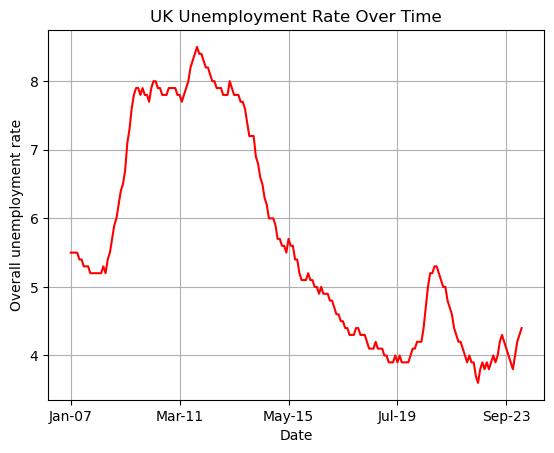

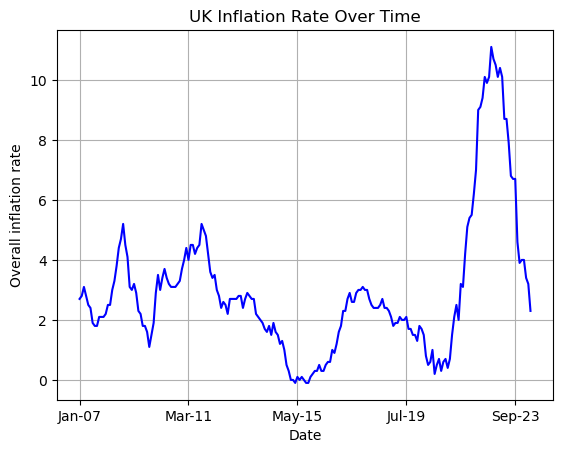

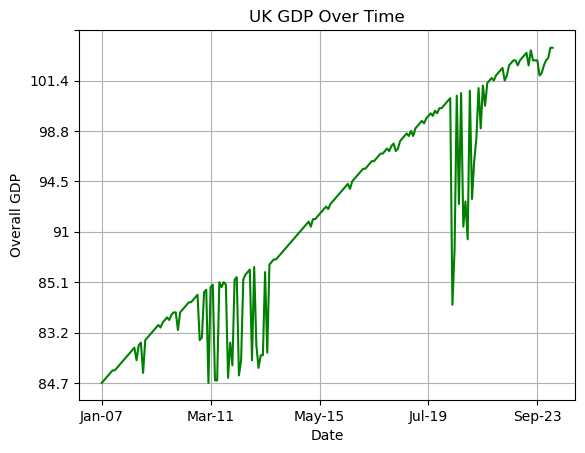

In [7]:
#plt.figure(figsize=(12, 8))
plt.plot('Date', 'UnemploymentRate', data = unemployment, color = 'red')
plt.title('UK Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Overall unemployment rate')
plt.xticks(ticks=range(0, 208, 50))
plt.grid()
plt.show();

#plt.figure(figsize=(12, 8))
plt.plot('Date', 'InflationRate', data = inflation, color = 'blue')
plt.title('UK Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Overall inflation rate')
plt.xticks(ticks=range(0, 208, 50))
plt.grid()
plt.show();

#plt.figure(figsize=(12, 8))
plt.plot('Date', 'Monthly GDP', data = gdp, color = 'green')
plt.title('UK GDP Over Time')
plt.xlabel('Date')
plt.ylabel('Overall GDP')
plt.xticks(ticks=range(0, 208, 50))
plt.yticks(ticks=range(0, 150, 20))
plt.grid()
plt.show();

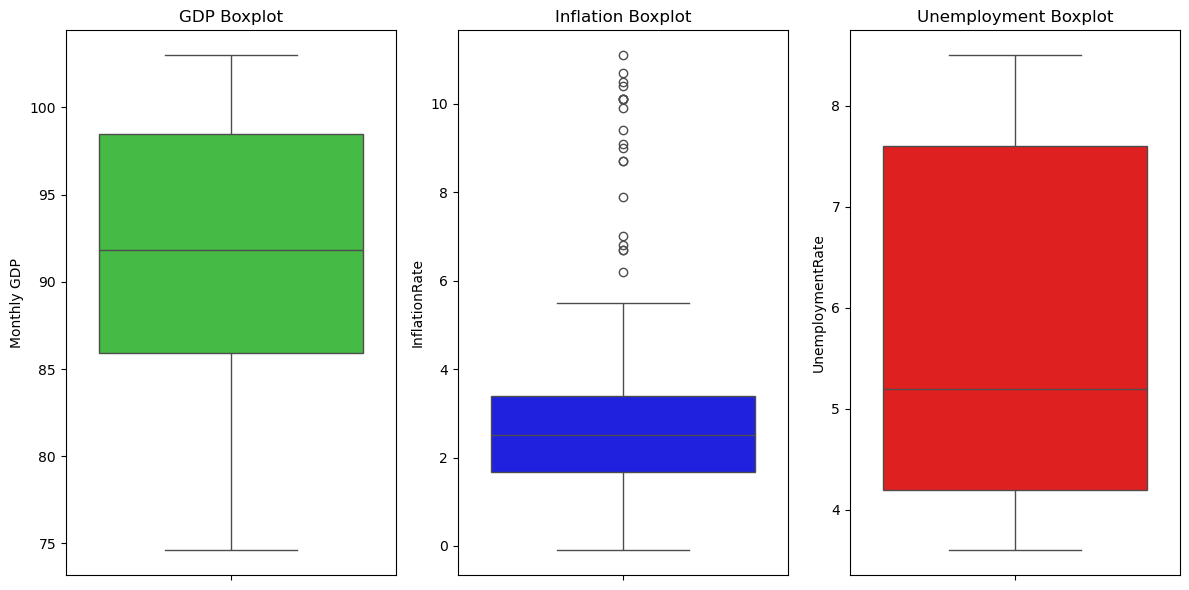

In [100]:
gdp_new = pd.to_numeric(gdp['Monthly GDP'], errors='coerce')

plt.figure(figsize=(12, 6))

# GDP Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=gdp_new, color = 'limegreen')
plt.title('GDP Boxplot')

# Inflation Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=inflation['InflationRate'], color = 'blue')
plt.title('Inflation Boxplot')

# Unemployment Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=unemployment['UnemploymentRate'], color = 'red')
plt.title('Unemployment Boxplot')

# Display the plots
plt.tight_layout()
plt.show();

In [8]:
# Converting Dates into datetime format.
# Changing dates into number format to allow for model fit.
unemployment['Date'] = pd.to_datetime(unemployment['Date'], format='%b-%y')
inflation['Date'] = pd.to_datetime(inflation['Date'], format='%b-%y')
gdp['Date'] = pd.to_datetime(gdp['Date'], format='%b-%y')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%b-%y')

# Extract year from 'Date'
unemployment['Year'] = unemployment['Date'].dt.year
unemployment

,Date,UnemploymentRate,Year
432,2007-01-01,5.5,2007
433,2007-02-01,5.5,2007
434,2007-03-01,5.5,2007
435,2007-04-01,5.5,2007
436,2007-05-01,5.4,2007
...,...,...,...
635,2023-12-01,3.8,2023
636,2024-01-01,4.0,2024
637,2024-02-01,4.2,2024
638,2024-03-01,4.3,2024


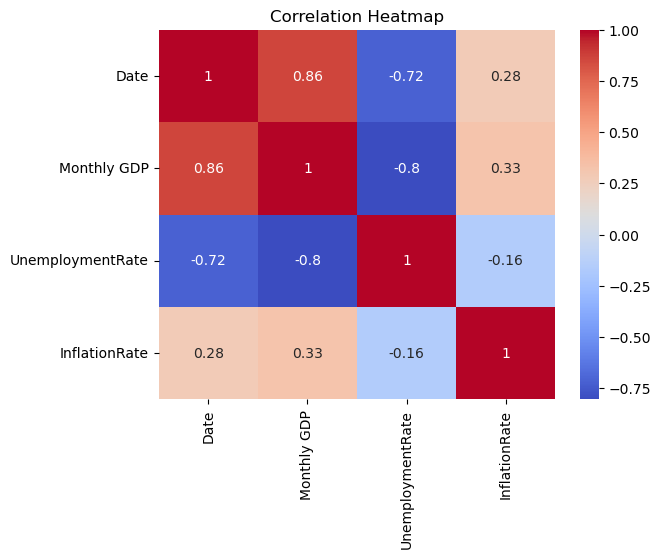

In [11]:
#plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show();

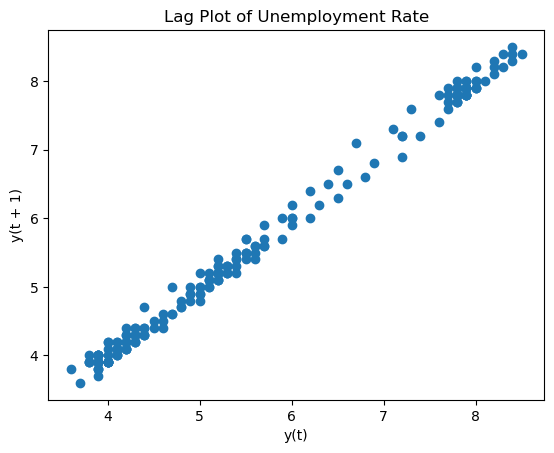

In [13]:
from pandas.plotting import lag_plot

#plt.figure(figsize=(6, 6))
lag_plot(unemployment['UnemploymentRate'])
plt.title('Lag Plot of Unemployment Rate')
plt.show();

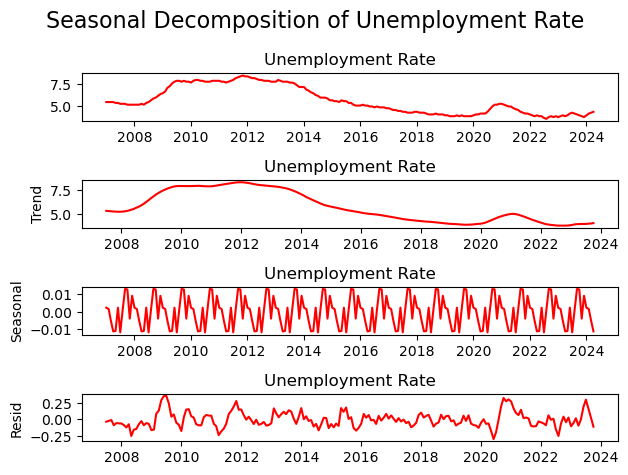

In [10]:
# Plotting Seasonal Decomposition of Unemployment
unemployment.set_index('Date', inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(unemployment['UnemploymentRate'], model='additive')

#plt.figure(figsize=(12, 9))

# Original time series
plt.subplot(411)
plt.plot(unemployment['UnemploymentRate'], color = 'red')
plt.title('Unemployment Rate')

# Trend Component
plt.subplot(412)
plt.plot(decompose.trend, color = 'red')
plt.title('Unemployment Rate')
plt.ylabel('Trend')

# Seasonal Component
plt.subplot(413)
plt.plot(decompose.seasonal, color = 'red')
plt.title('Unemployment Rate')
plt.ylabel('Seasonal')

# Residual Component
plt.subplot(414)
plt.plot(decompose.resid, color = 'red')
plt.title('Unemployment Rate')
plt.ylabel('Resid')

# Title
plt.suptitle('Seasonal Decomposition of Unemployment Rate', fontsize=16)

plt.tight_layout()
plt.show();

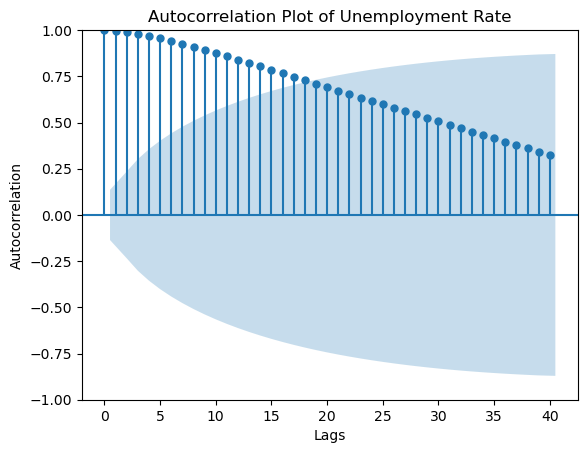

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

#plt.figure(figsize=(10, 6))
plot_acf(unemployment['UnemploymentRate'], lags=40)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot of Unemployment Rate')
plt.show();


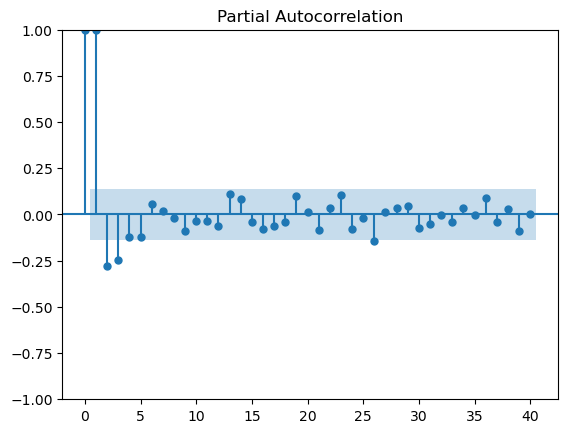

Text(0.5, 1.0, 'Partial Autocorrelation Plot of Unemployment Rate')

Text(0.5, 4.444444444444445, 'Lags')

Text(4.444444444444452, 0.5, 'Partial Autocorrelation')

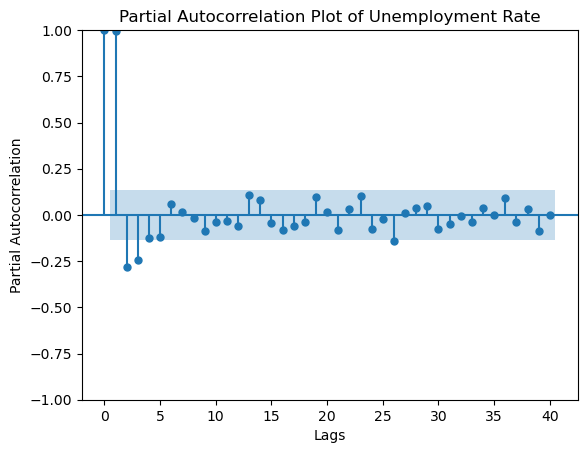

In [12]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(merged_df['UnemploymentRate'], lags=40)
plt.title('Partial Autocorrelation Plot of Unemployment Rate')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

# Hybrid Models
----

I combined traditional econometric methods with ML algorithms by taking inspiration from a blog post that combined Prophet with LSTM. You can find the post at https://subashpalvel.medium.com/time-series-forecasting-with-prophet-and-lstm-hybrid-mode-75f5295605e5.

Even though the study did not use Prophet, I specifically drew inspiration from the way they combined the forecasts by mathematically adding both predictions together to create a hybrid forecast. I applied this method to all models created in this study.

In [13]:
unemployment['diff'] = unemployment['UnemploymentRate'].diff()
unemployment['diff'].fillna(0, inplace=True)
unemployment

merged_df['Unemployment_Diff'] = merged_df['UnemploymentRate'].diff()
merged_df['Unemployment_Diff'].fillna(0, inplace=True)


#merged_df.dropna(inplace=True)


merged_df['gdp_lag'] = merged_df['Monthly GDP'].shift(1).fillna(0)
merged_df['inflation_lag'] = merged_df['InflationRate'].shift(1).fillna(0)
merged_df['unemployment_lag'] = merged_df['Unemployment_Diff'].shift(1).fillna(0)
merged_df

C:\Users\maxsh\AppData\Local\Temp\ipykernel_19276\1735340216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unemployment['diff'].fillna(0, inplace=True)


,UnemploymentRate,Year,diff
Date,,,
2007-01-01,5.5,2007,0.0
2007-02-01,5.5,2007,0.0
2007-03-01,5.5,2007,0.0
2007-04-01,5.5,2007,0.0
2007-05-01,5.4,2007,-0.1
...,...,...,...
2023-12-01,3.8,2023,-0.1
2024-01-01,4.0,2024,0.2
2024-02-01,4.2,2024,0.2


C:\Users\maxsh\AppData\Local\Temp\ipykernel_19276\1735340216.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Unemployment_Diff'].fillna(0, inplace=True)


,Date,Monthly GDP,UnemploymentRate,InflationRate,Unemployment_Diff,gdp_lag,inflation_lag,unemployment_lag
0,2007-01-01,84.7,5.5,2.7,0.0,0,0.0,0.0
1,2007-02-01,85,5.5,2.8,0.0,84.7,2.7,0.0
2,2007-03-01,85.3,5.5,3.1,0.0,85,2.8,0.0
3,2007-04-01,85.4,5.5,2.8,0.0,85.3,3.1,0.0
4,2007-05-01,85.8,5.4,2.5,-0.1,85.4,2.8,0.0
...,...,...,...,...,...,...,...,...
203,2023-12-01,102,3.8,4.0,-0.1,102.1,3.9,-0.1
204,2024-01-01,102.3,4.0,4.0,0.2,102,4.0,-0.1
205,2024-02-01,102.6,4.2,3.4,0.2,102.3,4.0,0.2
206,2024-03-01,103,4.3,3.2,0.1,102.6,3.4,0.2


In [14]:
merged_df.set_index('Date', inplace=True)

In [15]:
unemployment = unemployment.asfreq('MS')
merged_df = merged_df.asfreq('MS')

# LSTM + ARIMA 3-Year Forecast

References for this ARIMA-LSTM

For building the ARIMA model I took inpiration from machinelearningmastery. I also used a blog from medium to help forecast on the test data

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
https://medium.com/datainc/time-series-analysis-and-forecasting-with-arima-in-python-aa22694b3aaa

I have taken inspiration from machinelearningmastery for building the LSTM model. However, I have made ajustments to the code to fit the hybrid model requirements 

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

This article on medium helped me develop the sequences for the LSTM. I have also incorporated this sequence method into other models for capturing temporal dependencies
https://medium.com/@udaytripurani04/stock-market-predictions-using-lstm-and-gru-models-with-python-ca103183dbc0



                               SARIMAX Results                                
Dep. Variable:       UnemploymentRate   No. Observations:                  160
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 156.610
Date:                Sun, 04 Aug 2024   AIC                           -307.220
Time:                        15:55:49   BIC                           -298.013
Sample:                    01-01-2007   HQIC                          -303.481
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2018      0.071      2.857      0.004       0.063       0.340
ar.L2          0.4369      0.076      5.749      0.000       0.288       0.586
sigma2         0.0081      0.001      9.955      0.0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 10)              │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,381 (5.39 KB)

 Trainable params: 1,381 (5.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1450
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1221
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1088 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0893 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0772 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0669 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0559 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0373 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0322
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0275 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0198 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0226 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0219 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0212 
Epoch 16/50
2/2 ━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Scaled Unemployment Rate')

Text(0.5, 1.0, 'Hybrid ARIMA-LSTM Forecast vs Actual 3-Y')

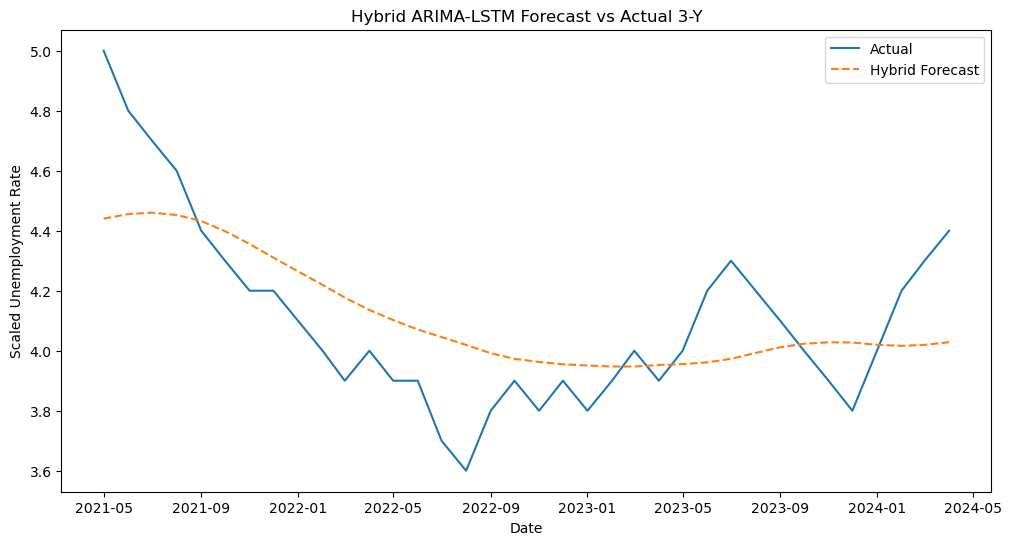

''

Hybrid Model RMSE: 0.2193675090146577
Hybrid Model MAE: 0.18191616551313483
Mean Squared Error: 0.048122104011295935
Hybrid Model MAPE: 0.04394961078092659


In [94]:
# Split data into train and test sets 4-Year Forecast
forecast_period = 4 * 12
train_size = len(unemployment) - forecast_period
train, test = unemployment[:train_size], unemployment[train_size:]

target = 'UnemploymentRate'
#features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit ARIMA model
arima_order = (2, 1, 0)
arima_model = ARIMA(train[target], order=arima_order)
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecast and calculate residuals
arima_forecast = arima_fit.forecast(steps=len(test))
residuals = test[target] - arima_forecast
# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))


# Prepare the data for LSTM
time_step = 12
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

train_dates = unemployment.index[:train_size]
test_dates = unemployment.index[train_size:]

# Define LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

tf.keras.backend.clear_session()

# Predict residuals using LSTM model
# Make sure to use the same shape for prediction as used for training
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the ARIMA forecast and predicted residuals
arima_forecast = arima_forecast[time_step:]

# Combine ARIMA forecast and LSTM predicted residuals
forecast_dates = test_dates[time_step:] 
actual_values = test[target][time_step:]
hybrid_forecast = arima_forecast.values + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_dates[time_step:], test[target][time_step:], label='Actual')
plt.plot(test_dates[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Scaled Unemployment Rate')
plt.title('Hybrid ARIMA-LSTM Forecast vs Actual 3-Y')
plt.legend()
plt.savefig('ARIMA-LSTM-3Y.png')
plt.show()

;

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

## ARIMA + LSTM 1-Year Forecast

                               SARIMAX Results                                
Dep. Variable:       UnemploymentRate   No. Observations:                  184
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 175.280
Date:                Sun, 04 Aug 2024   AIC                           -344.560
Time:                        15:56:04   BIC                           -334.931
Sample:                    01-01-2007   HQIC                          -340.657
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2511      0.066      3.781      0.000       0.121       0.381
ar.L2          0.4050      0.072      5.592      0.000       0.263       0.547
sigma2         0.0086      0.001     10.375      0.0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 10)              │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,381 (5.39 KB)

 Trainable params: 1,381 (5.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3771
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3653
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3537
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3421
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3307
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3194
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3082
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2971
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2861
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2752
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2643
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2535
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2427
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2319
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2212
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

Text(0.5, 1.0, 'Hybrid ARIMA-LSTM Forecast vs Actual 1-Y')

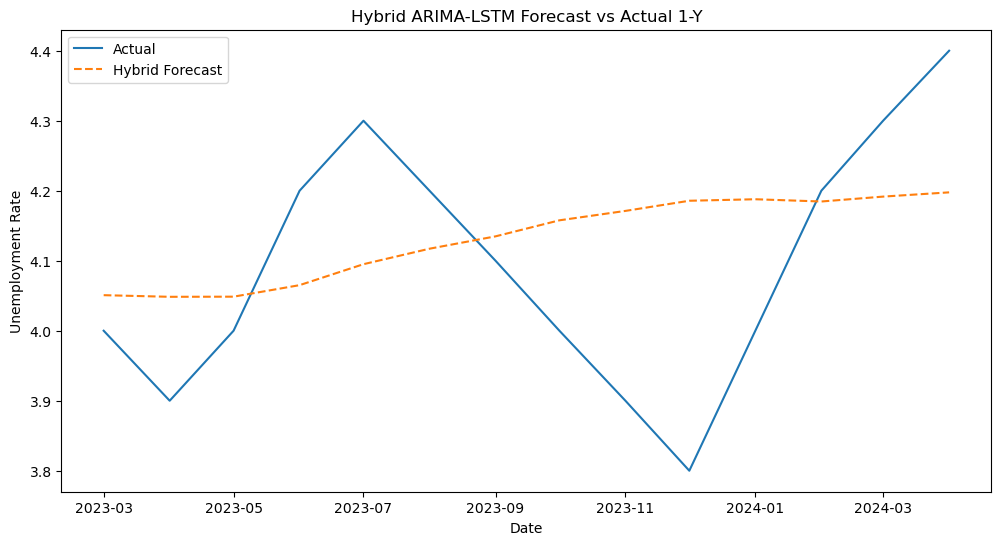

Hybrid Model RMSE: 0.17537881018876678
Hybrid Model MAE: 0.14527658721023787
Mean Squared Error: 0.030757727063227484
Hybrid Model MAPE: 0.03594148708333291


In [95]:
# Split data into train and test sets 4-Year Forecast
forecast_period = 2 * 12 
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit ARIMA model
arima_order = (2, 1, 0)
arima_model = ARIMA(train[target], order=arima_order)
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecast and calculate residuals
arima_forecast = arima_fit.forecast(steps=len(test))
residuals = test[target] - arima_forecast
# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))

# Prepare the data for LSTM


# Prepare the data for LSTM
time_step = 10
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

X = X.reshape(X.shape[0], X.shape[1], 1)

train_dates = merged_df.index[:train_size]
test_dates = merged_df.index[train_size:]

# Define LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

tf.keras.backend.clear_session()

# Predict residuals using LSTM model
# Make sure to use the same shape for prediction as used for training
#X_test_seq, _ = create_sequences(X_scaled[-len(test):], time_step) # This
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the ARIMA forecast and predicted residuals
arima_forecast = arima_forecast[time_step:]

# Combine ARIMA forecast and LSTM predicted residuals
forecast_dates = test_dates[time_step:] 
actual_values = test[target][time_step:]
hybrid_forecast = arima_forecast.values + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_dates[time_step:], test[target][time_step:], label='Actual')
plt.plot(test_dates[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Hybrid ARIMA-LSTM Forecast vs Actual 1-Y')
plt.legend()
plt.savefig('ARIMA-LSTM-1Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

## ARIMA + GRU 3-Year Forecast

I used the previous ARIMA method here.

I also used an article from medium to help with the GRU setup.
https://medium.com/@udaytripurani04/stock-market-predictions-using-lstm-and-gru-models-with-python-ca103183dbc0

                               SARIMAX Results                                
Dep. Variable:       UnemploymentRate   No. Observations:                  160
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 156.610
Date:                Sun, 04 Aug 2024   AIC                           -307.220
Time:                        15:56:16   BIC                           -298.013
Sample:                    01-01-2007   HQIC                          -303.481
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2018      0.071      2.857      0.004       0.063       0.340
ar.L2          0.4369      0.076      5.749      0.000       0.288       0.586
sigma2         0.0081      0.001      9.955      0.0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 12, 10)              │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 10)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,111 (4.34 KB)

 Trainable params: 1,111 (4.34 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0164
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0127
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0124 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0117 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0102
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0102
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0094
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0096
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0091
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0089 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0088
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0093
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0100
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0095
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0087
Epoch 16/50
2/2 ━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

Text(0.5, 1.0, 'Hybrid ARIMA-GRU Forecast vs Actual 3-Y')

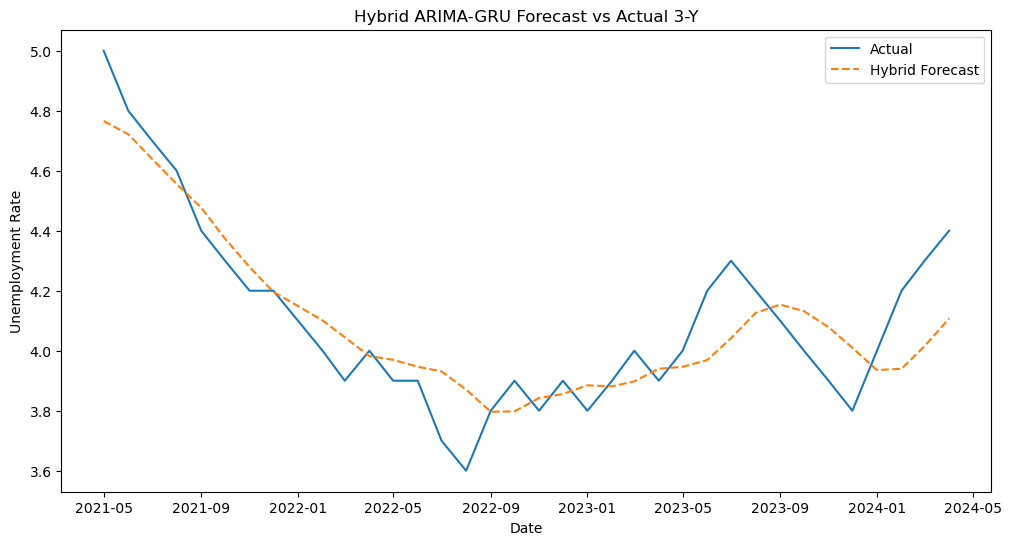

Hybrid Model RMSE: 0.14422685174782848
Hybrid Model MAE: 0.11423036953302029
Mean Squared Error: 0.020801384765090098
Hybrid Model MAPE: 0.027852861187805285


In [96]:
# Split data into train and test sets 4-Year Forecast
forecast_period = 4 * 12 
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit ARIMA model
arima_order = (2, 1, 0)
arima_model = ARIMA(train[target], order=arima_order)
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecast and calculate residuals
arima_forecast = arima_fit.forecast(steps=len(test))
residuals = test[target] - arima_forecast
# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))

# Prepare the data for LSTM
time_step = 12
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

X = X.reshape(X.shape[0], X.shape[1], 1)

# Building the GRU model
model = Sequential()
model.add(GRU(10, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

print(model.summary())

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

tf.keras.backend.clear_session()

# Predict residuals using LSTM model
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the ARIMA forecast and predicted residuals
arima_forecast = arima_forecast[time_step:]

# Combine ARIMA forecast and LSTM predicted residuals
forecast_dates = test.index[time_step:] 
actual_values = test[target].values[time_step:]
hybrid_forecast = arima_forecast.values + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual_values, label='Actual')
plt.plot(forecast_dates, hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Hybrid ARIMA-GRU Forecast vs Actual 3-Y')
plt.legend()
plt.savefig('ARIMA-GRU-3Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

# ARIMA - GRU 1-Year Forecast

                               SARIMAX Results                                
Dep. Variable:       UnemploymentRate   No. Observations:                  184
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 175.280
Date:                Sun, 04 Aug 2024   AIC                           -344.560
Time:                        15:56:30   BIC                           -334.931
Sample:                    01-01-2007   HQIC                          -340.657
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2511      0.066      3.781      0.000       0.121       0.381
ar.L2          0.4050      0.072      5.592      0.000       0.263       0.547
sigma2         0.0086      0.001     10.375      0.0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 12, 10)              │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 10)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,111 (4.34 KB)

 Trainable params: 1,111 (4.34 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.4850
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.4527
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.4219
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3926
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3646
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3379
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3124
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2882
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2651
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2433
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2226
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2030
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1846
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1673
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1512
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

Text(0.5, 1.0, 'Hybrid ARIMA-GRU Forecast vs Actual 1-Y')

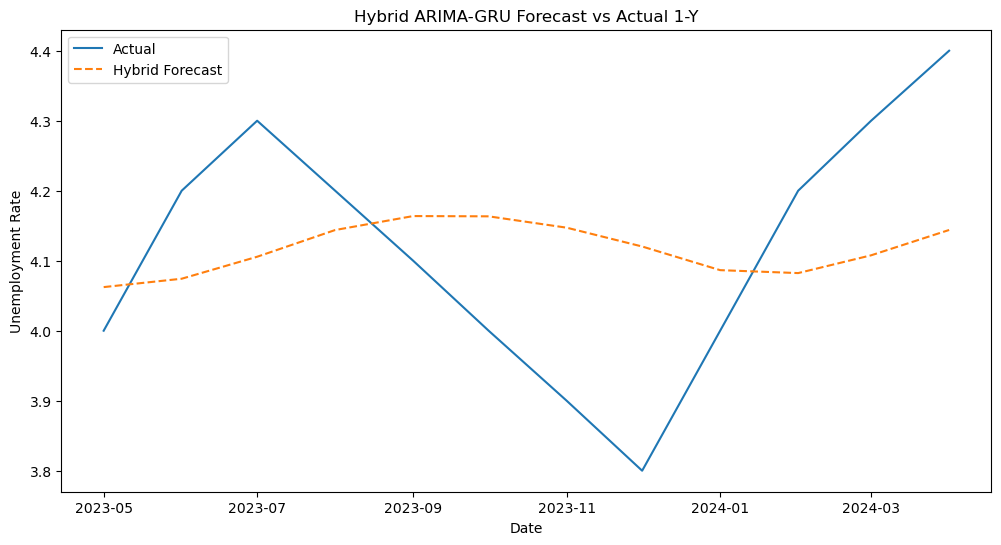

Hybrid Model RMSE: 0.17770705719696853
Hybrid Model MAE: 0.15714647616941557
Mean Squared Error: 0.031579798177606644
Hybrid Model MAPE: 0.03839344432203529


In [97]:
# Split data into train and test sets 4-Year Forecast
forecast_period = 2 * 12 
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit ARIMA model
arima_order = (2, 1, 0)
arima_model = ARIMA(train[target], order=arima_order)
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecast and calculate residuals
arima_forecast = arima_fit.forecast(steps=len(test))
residuals = test[target] - arima_forecast
# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))


# Prepare the data for LSTM
time_step = 12
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

X = X.reshape(X.shape[0], X.shape[1], 1)

# Building the GRU model
model = Sequential()
model.add(GRU(10, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

print(model.summary())

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

tf.keras.backend.clear_session()

# Predict residuals using LSTM model
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals).flatten()

# Align the lengths of the ARIMA forecast and predicted residuals
arima_forecast = arima_forecast[time_step:]

# Combine ARIMA forecast and LSTM predicted residuals
forecast_dates = test.index[time_step:] 
actual_values = test[target].values[time_step:]
hybrid_forecast = arima_forecast.values + predicted_residuals

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual_values, label='Actual')
plt.plot(forecast_dates, hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Hybrid ARIMA-GRU Forecast vs Actual 1-Y')
plt.legend()
plt.savefig('ARIMA-GRU-1Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

## Exponential Smoothing + SVR 3-Year Forecast

References for ES: https://www.statsmodels.org/v0.10.2/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

References for SVR:
https://medium.com/@nandiniverma78988/an-introduction-to-support-vector-regression-svr-in-machine-learning-681d541a829a


SVR()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid Exponential Smoothing-SVR Forecast vs Actual 3-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

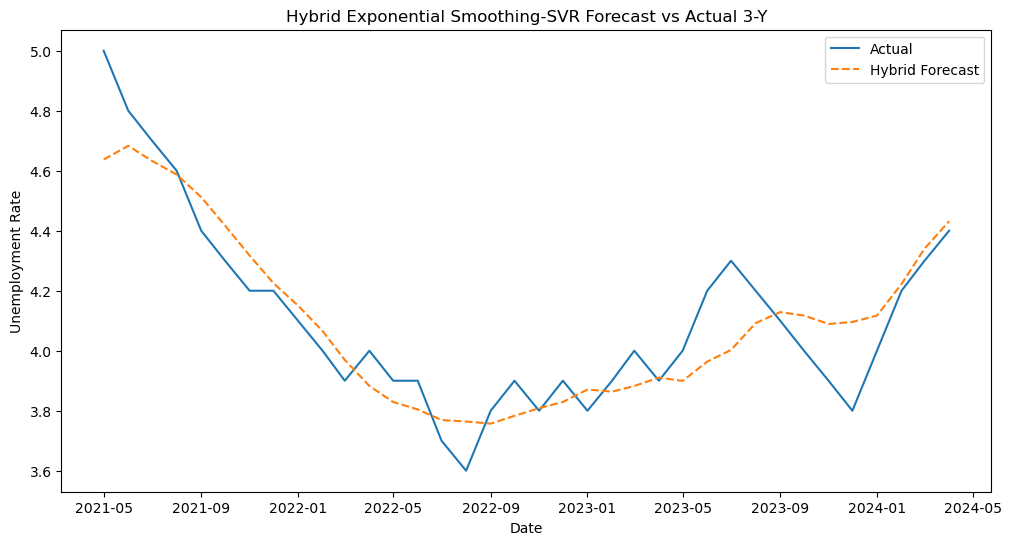

Hybrid Model RMSE: 0.1316094555527035
Hybrid Model MAE: 0.10259448202779509
Mean Squared Error: 0.01732104879087904
Hybrid Model MAPE: 0.024870850162613298


In [98]:
# Split data into train and test sets
forecast_period = 4 * 12  # 4 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit Exponential Smoothing model
es_model = ExponentialSmoothing(train[target], trend='add', seasonal='add', seasonal_periods=12)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=len(test))

residuals = test[target] - es_forecast

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create sequences for SVR
time_step = 12
X_svr, y_svr = [], []
for i in range(time_step, len(scaled_residuals)):
    X_svr.append(scaled_residuals[i-time_step:i, 0])
    y_svr.append(scaled_residuals[i, 0])

X_svr, y_svr = np.array(X_svr), np.array(y_svr)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_svr, y_svr)

# Predict residuals using SVR model
predicted_residuals = svr_model.predict(X_svr)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the ES forecast and predicted residuals
es_forecast = es_forecast[time_step:]

# Combine ES forecast and SVR predicted residuals
actual_values = test[target].values[time_step:]
hybrid_forecast = es_forecast.values + predicted_residuals

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle = '--')
plt.legend()
plt.title('Hybrid Exponential Smoothing-SVR Forecast vs Actual 3-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('ES-SVR-3Y.png')
plt.show();


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

# ES - SVR 1-Year Forecast

SVR()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid Exponential Smoothing-SVR Forecast vs Actual 1-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

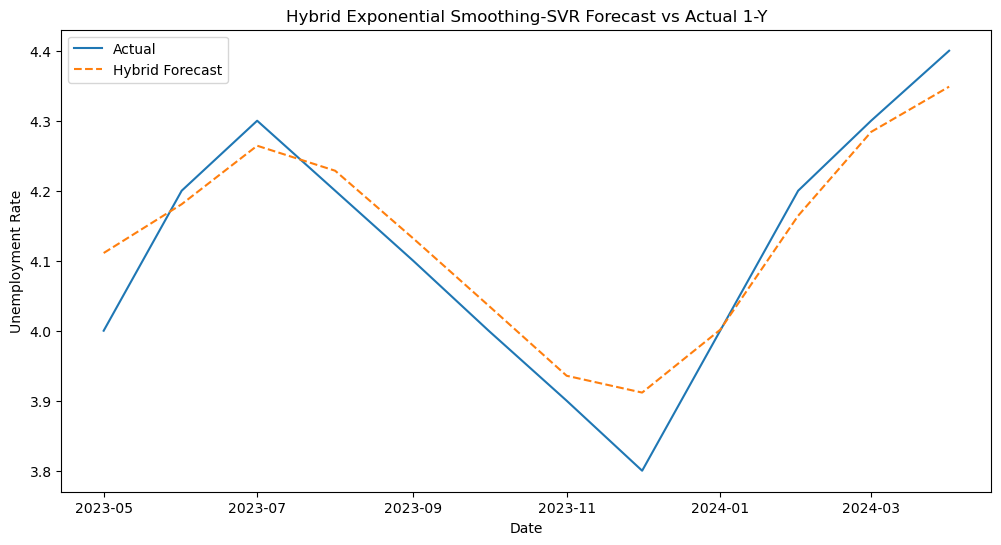

Hybrid Model RMSE: 0.05399304651003016
Hybrid Model MAE: 0.04282184127948433
Mean Squared Error: 0.00291524907143428
Hybrid Model MAPE: 0.010575454060778118


In [99]:
# Split data into train and test sets
forecast_period = 2 * 12  # 4 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit Exponential Smoothing model
es_model = ExponentialSmoothing(train[target], trend='add', seasonal='add')
es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=len(test))

residuals = test[target] - es_forecast

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create sequences for SVR
time_step = 12
X_svr, y_svr = [], []
for i in range(time_step, len(scaled_residuals)):
    X_svr.append(scaled_residuals[i-time_step:i, 0])
    y_svr.append(scaled_residuals[i, 0])

X_svr, y_svr = np.array(X_svr), np.array(y_svr)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_svr, y_svr)

# Predict residuals using SVR model
predicted_residuals = svr_model.predict(X_svr)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the ES forecast and predicted residuals
es_forecast = es_forecast[time_step:]

# Combine ES forecast and SVR predicted residuals
actual_values = test[target].values[time_step:]
hybrid_forecast = es_forecast.values + predicted_residuals

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle = '--')
plt.legend()
plt.title('Hybrid Exponential Smoothing-SVR Forecast vs Actual 1-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('ES-SVR-1Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

## Exponential smoothing + Random Forest 3-Year Forecast

References for RF: https://www.geeksforgeeks.org/random-forest-regression-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


The same Exponential smoothing model was used here.


RandomForestRegressor(random_state=42)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid Exponential Smoothing-Random Forest Forecast vs Actual 3-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

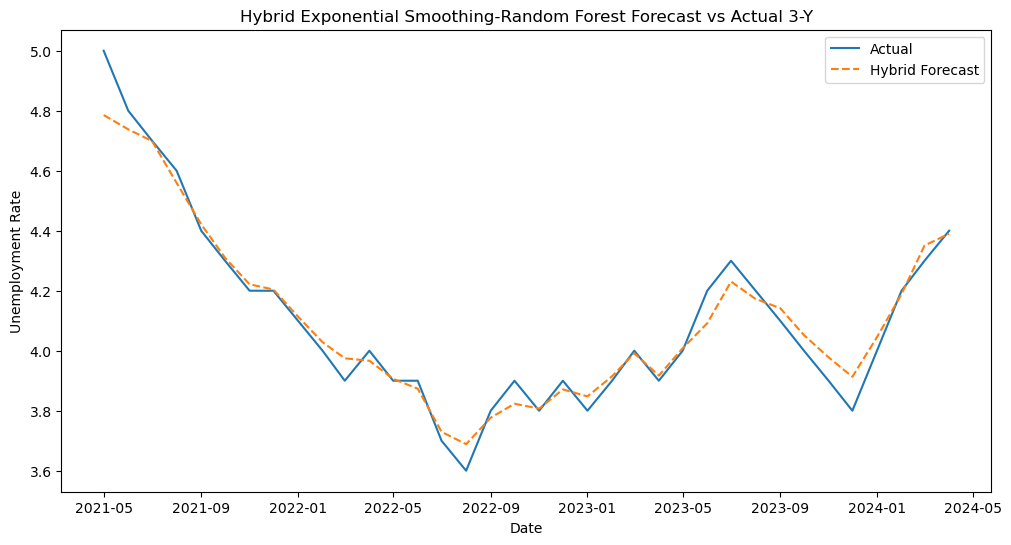

Hybrid Model RMSE: 0.059019356412110625
Hybrid Model MAE: 0.042097827260698883
Mean Squared Error: 0.003483284431299744
Hybrid Model MAPE: 0.01018000559175068


In [50]:
# Split data into train and test sets
forecast_period = 4 * 12  # 2 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

X = merged_df[features].values
y = merged_df[target].values

# Fit Exponential Smoothing model
es_model = ExponentialSmoothing(train[target], trend='add', seasonal='add', seasonal_periods=12)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=len(test))

# Calculate residuals
residuals = test[target] - es_forecast

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create sequences for Random Forest
time_step = 12
X_rf, y_rf = [], []
for i in range(time_step, len(scaled_residuals)):
    X_rf.append(scaled_residuals[i-time_step:i, 0])
    y_rf.append(scaled_residuals[i, 0])

X_rf, y_rf = np.array(X_rf), np.array(y_rf)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# Predict residuals using Random Forest model
predicted_residuals = rf_model.predict(X_rf)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the ES forecast and predicted residuals
es_forecast_aligned = es_forecast[time_step:]

# Combine ES forecast and Random Forest predicted residuals
actual_values = test[target].values[time_step:]
hybrid_forecast = es_forecast_aligned.values + predicted_residuals

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle = '--')
plt.legend()
plt.title('Hybrid Exponential Smoothing-Random Forest Forecast vs Actual 3-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('ES-RF-3Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

## Exponential smoothing + Random Forest 1-Year Forecast

RandomForestRegressor(random_state=42)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid Exponential Smoothing-Random Forest Forecast vs Actual 1-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

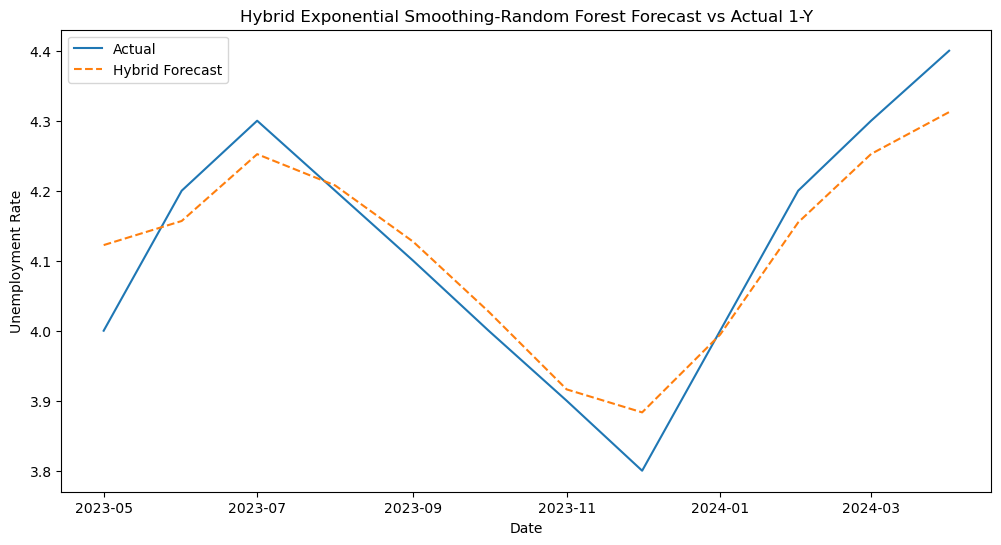

Hybrid Model RMSE: 0.0576498533894681
Hybrid Model MAE: 0.046737928017382115
Mean Squared Error: 0.0033235055958271663
Hybrid Model MAPE: 0.011370934290038265


In [51]:
# Split data into train and test sets
forecast_period = 2 * 12  # 2 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

X = merged_df[features].values
y = merged_df[target].values

# Fit Exponential Smoothing model
es_model = ExponentialSmoothing(train[target], trend='add', seasonal='add', seasonal_periods=12)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(steps=len(test))

# Calculate residuals
residuals = test[target] - es_forecast

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Create sequences for Random Forest
time_step = 12
X_rf, y_rf = [], []
for i in range(time_step, len(scaled_residuals)):
    X_rf.append(scaled_residuals[i-time_step:i, 0])
    y_rf.append(scaled_residuals[i, 0])

X_rf, y_rf = np.array(X_rf), np.array(y_rf)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# Predict residuals using Random Forest model
predicted_residuals = rf_model.predict(X_rf)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the ES forecast and predicted residuals
actual_values = test[target].values[time_step:]
es_forecast_aligned = es_forecast[time_step:]

# Combine ES forecast and Random Forest predicted residuals
hybrid_forecast = es_forecast_aligned.values + predicted_residuals

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle = '--')
plt.legend()
plt.title('Hybrid Exponential Smoothing-Random Forest Forecast vs Actual 1-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('ES-RF-1Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

## VAR + LSTM 3-Year Forecast

References for VAR: https://www.statsmodels.org/dev/vector_ar.html

In [53]:
from statsmodels.tsa.api import VAR
train


,Monthly GDP,UnemploymentRate,InflationRate,Unemployment_Diff,gdp_lag,inflation_lag,unemployment_lag
Date,,,,,,,
2007-01-01,84.7,5.5,2.7,0.0,0.0,0.0,0.0
2007-02-01,85.0,5.5,2.8,0.0,84.7,2.7,0.0
2007-03-01,85.3,5.5,3.1,0.0,85.0,2.8,0.0
2007-04-01,85.4,5.5,2.8,0.0,85.3,3.1,0.0
2007-05-01,85.8,5.4,2.5,-0.1,85.4,2.8,0.0
...,...,...,...,...,...,...,...
2019-12-01,100.8,3.9,1.3,0.0,100.3,1.5,0.0
2020-01-01,100.8,4.0,1.8,0.1,100.8,1.3,0.0
2020-02-01,100.4,4.1,1.7,0.1,100.8,1.8,0.1


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Aug, 2024
Time:                     08:48:19
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -4.36435
Nobs:                     145.000    HQIC:                  -6.04623
Log likelihood:           42.5719    FPE:                0.000801225
AIC:                     -7.19738    Det(Omega_mle):     0.000350557
--------------------------------------------------------------------
Results for equation gdp_lag
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        1.828964         1.466435            1.247           0.212
L1.gdp_lag                   0.756565         0.191267            3.956           0.000
L1.inflation_lag             0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3648
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2180 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0973
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0376 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0562 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0459
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0299
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0268
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0285
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0291
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0289 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0257 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0263
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0266
Epoch 16/50
2/2 ━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

Text(0.5, 1.0, 'Hybrid VAR-LSTM Forecast vs Actual 3-Y')

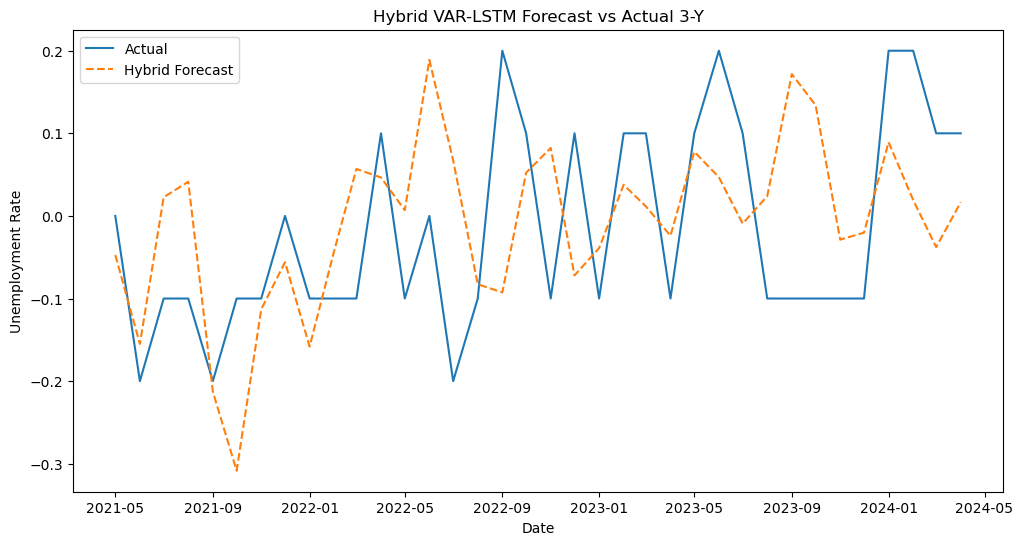

Hybrid Model RMSE: 0.13675456181299
Hybrid Model MAE: 0.11426813921070826
Mean Squared Error: 0.018701810176662906


In [61]:
## MULTIVARIATE

# Split data into train and test sets for a 4-Year Forecast
forecast_period = 4 * 12 
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'Unemployment_Diff'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Prepare predictors and target
X = merged_df[features].values
y = merged_df[target].values

train = train.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Normalize target (if needed)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Fit VAR model
var_model = VAR(train[features])
var_result = var_model.fit(maxlags=15)
print(var_result.summary())

# Make predictions using VAR model
var_forecast = var_result.forecast(train[features].values[-var_result.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=features)

# Calculate residuals
residuals = test[features].values - var_forecast

# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals[:, -1].reshape(-1, 1))

# Prepare data for LSTM
time_step = 12

# Create sequences for Random Forest

X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

#X, y = create_sequences(scaled_residuals, time_step)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)
tf.keras.backend.clear_session()

# Predict residuals using LSTM model
#X_test_seq, _ = create_sequences(scaled_residuals, time_step)
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the VAR forecast and predicted residuals
var_forecast_aligned = var_forecast_df[features[-1]].values[time_step:]

# Combine VAR forecast and LSTM predicted residuals
forecast_dates = test.index[time_step:] 
actual_values = test[target].values[time_step:]
hybrid_forecast = var_forecast_aligned + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual_values, label='Actual')
plt.plot(forecast_dates, hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Hybrid VAR-LSTM Forecast vs Actual 3-Y')
plt.legend()
plt.savefig('VAR-LSTM-3Y.png')
plt.show();

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

## VAR + LSTM 1-Year Forecast

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Aug, 2024
Time:                     08:57:18
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.12089
Nobs:                     169.000    HQIC:                  -4.63948
Log likelihood:          -101.724    FPE:                 0.00357268
AIC:                     -5.67666    Det(Omega_mle):      0.00173516
--------------------------------------------------------------------
Results for equation gdp_lag
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        4.519728         3.023400            1.495           0.135
L1.gdp_lag                   1.347766         0.090885           14.829           0.000
L1.inflation_lag             0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.3217
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2655
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2172
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1765
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1443
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1236
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1179
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1278
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1417
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1465
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1418
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1330
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1248
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1194
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1173
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

Text(0.5, 1.0, 'Hybrid VAR-LSTM Forecast vs Actual 1-Y')

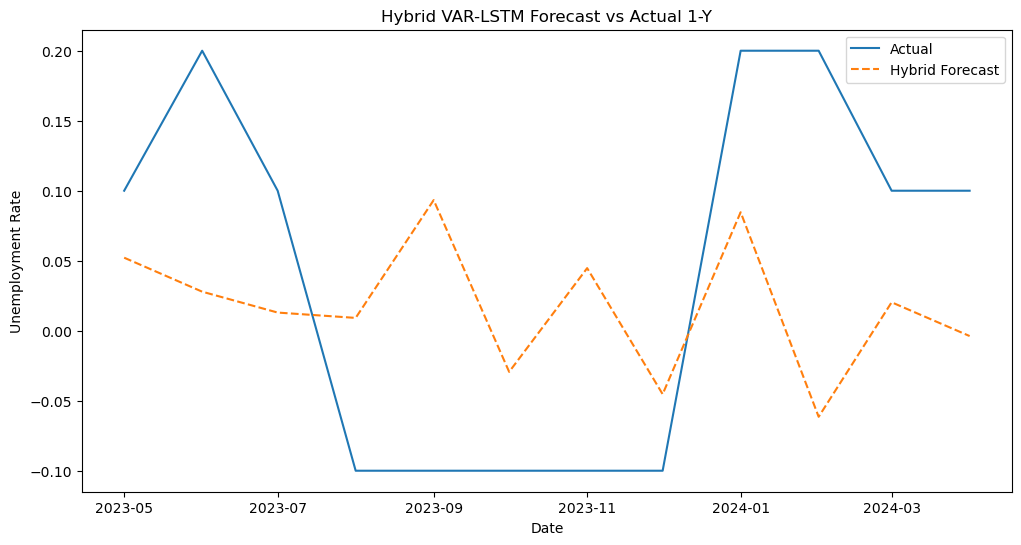

Hybrid Model RMSE: 0.13431620638699965
Hybrid Model MAE: 0.11998153902643556
Mean Squared Error: 0.018040843298195084


In [63]:
## MULTIVARIATE

# Split data into train and test sets for a 4-Year Forecast
forecast_period = 2 * 12 
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'Unemployment_Diff'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Prepare predictors and target
X = merged_df[features].values
y = merged_df[target].values

train = train.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Normalize target (if needed)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Fit VAR model
var_model = VAR(train[features])
var_result = var_model.fit(maxlags=15)
print(var_result.summary())

# Make predictions using VAR model
var_forecast = var_result.forecast(train[features].values[-var_result.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=features)

# Calculate residuals
residuals = test[features].values - var_forecast

# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals[:, -1].reshape(-1, 1))

# Prepare data for LSTM
time_step = 12

# Create sequences for Random Forest

X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

#X, y = create_sequences(scaled_residuals, time_step)

# Define and train the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)
tf.keras.backend.clear_session()

# Predict residuals using LSTM model
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the VAR forecast and predicted residuals
var_forecast_aligned = var_forecast_df[features[-1]].values[time_step:]

# Combine VAR forecast and LSTM predicted residuals
forecast_dates = test.index[time_step:] 
actual_values = test[target].values[time_step:]
hybrid_forecast = var_forecast_aligned + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual_values, label='Actual')
plt.plot(forecast_dates, hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Hybrid VAR-LSTM Forecast vs Actual 1-Y')
plt.legend()
plt.savefig('VAR-LSTM-1Y.png')
plt.show();

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

## VAR - GRU 3-Year Forecast

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Aug, 2024
Time:                     10:48:49
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -4.36435
Nobs:                     145.000    HQIC:                  -6.04623
Log likelihood:           42.5719    FPE:                0.000801225
AIC:                     -7.19738    Det(Omega_mle):     0.000350557
--------------------------------------------------------------------
Results for equation gdp_lag
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        1.828964         1.466435            1.247           0.212
L1.gdp_lag                   0.756565         0.191267            3.956           0.000
L1.inflation_lag             0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 12, 15)              │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.3087
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2505
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1881
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1353 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1018
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0690
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0481 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0331
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0273
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0283
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0321
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0366
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0371
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0389
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0353
Epoch 16/50
2/2 ━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Scaled Unemployment Rate')

Text(0.5, 1.0, 'Hybrid VAR-GRU Forecast vs Actual 3-Y')

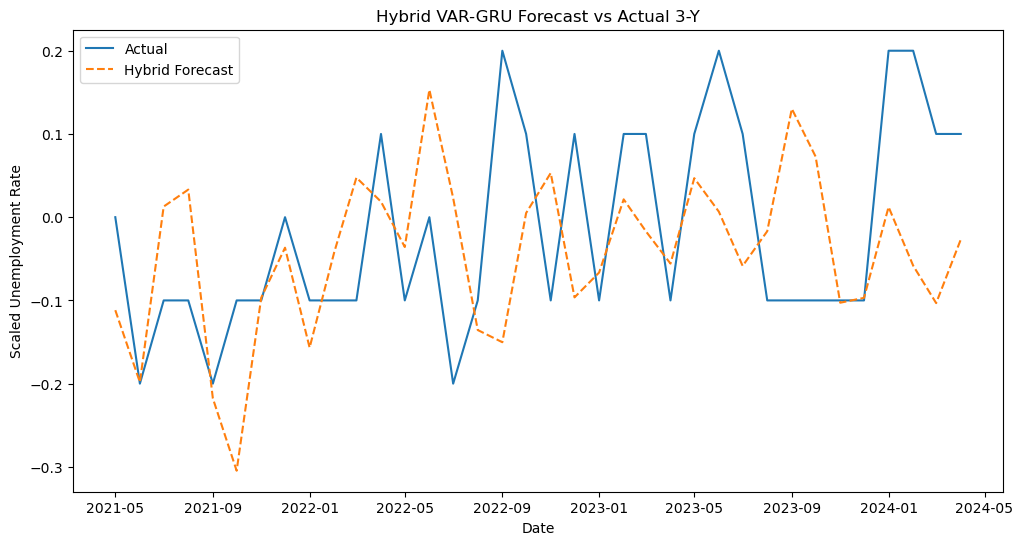

Hybrid Model RMSE: 0.14250003032239975
Hybrid Model MAE: 0.1161632343889248
Mean Squared Error: 0.020306258641884845


In [67]:
# Split data into train and test sets for a 4-Year Forecast
forecast_period = 4 * 12 
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'Unemployment_Diff'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Prepare predictors and target
X = merged_df[features].values
y = merged_df[target].values

train = train.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Normalize target (if needed)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Fit VAR model
var_model = VAR(train[features])
var_result = var_model.fit(maxlags=15)
print(var_result.summary())

# Make predictions using VAR model
var_forecast = var_result.forecast(train[features].values[-var_result.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=features)

# Calculate residuals
residuals = test[features].values - var_forecast

# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals[:, -1].reshape(-1, 1))


time_step = 12
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

# Building the GRU model
model = Sequential()
model.add(GRU(15, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

print(model.summary())

# Train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)
tf.keras.backend.clear_session()

# Predict residuals using LSTM model
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the VAR forecast and predicted residuals
var_forecast_aligned = var_forecast_df[features[-1]].values[time_step:]

# Combine VAR forecast and LSTM predicted residuals
forecast_dates = test.index[time_step:] 
actual_values = test[target].values[time_step:]
hybrid_forecast = var_forecast_aligned + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual_values, label='Actual')
plt.plot(forecast_dates, hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Scaled Unemployment Rate')
plt.title('Hybrid VAR-GRU Forecast vs Actual 3-Y')
plt.legend()
plt.savefig('VAR-GRU-3Y.png')
plt.show();

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

# VAR-GRU 1-Year Forecast

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Aug, 2024
Time:                     10:48:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.12089
Nobs:                     169.000    HQIC:                  -4.63948
Log likelihood:          -101.724    FPE:                 0.00357268
AIC:                     -5.67666    Det(Omega_mle):      0.00173516
--------------------------------------------------------------------
Results for equation gdp_lag
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        4.519728         3.023400            1.495           0.135
L1.gdp_lag                   1.347766         0.090885           14.829           0.000
L1.inflation_lag             0

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 12, 15)              │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.7793
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.7237
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6720
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.6242
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.5798
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.5386
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5005
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.4651
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.4324
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4021
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3740
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3480
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.3240
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3019
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.2814
Epoch 16/50
1/1 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Scaled Unemployment Rate')

Text(0.5, 1.0, 'Hybrid VAR-GRU Forecast vs Actual 1-Y')

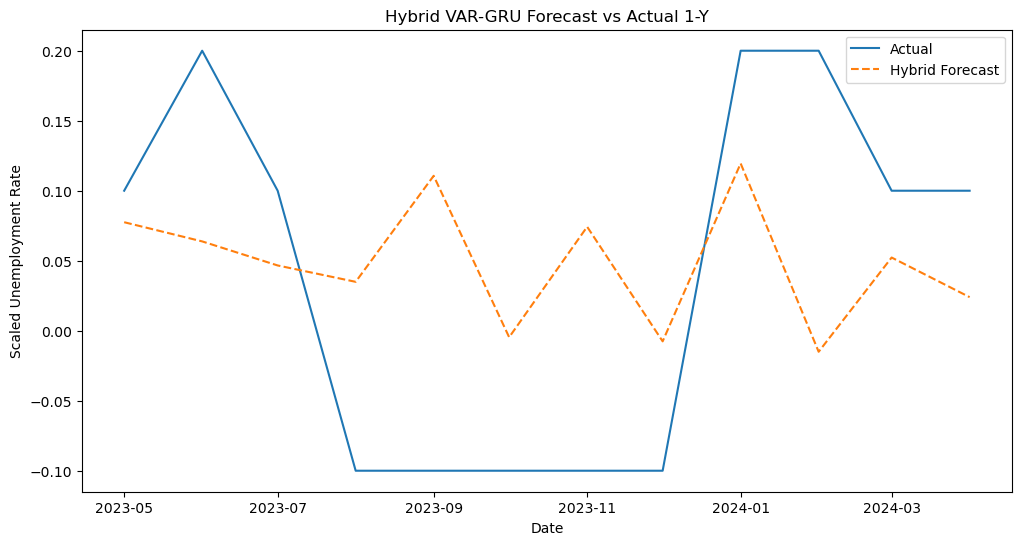

Hybrid Model RMSE: 0.1269048816579857
Hybrid Model MAE: 0.11157981808661059
Mean Squared Error: 0.016104848988627355


In [66]:
# Split data into train and test sets for a 4-Year Forecast
forecast_period = 2 * 12 
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'Unemployment_Diff'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Prepare predictors and target
X = merged_df[features].values
y = merged_df[target].values

train = train.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Normalize target (if needed)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Fit VAR model
var_model = VAR(train[features])
var_result = var_model.fit(maxlags=15)
print(var_result.summary())

# Make predictions using VAR model
var_forecast = var_result.forecast(train[features].values[-var_result.k_ar:], steps=len(test))
var_forecast_df = pd.DataFrame(var_forecast, index=test.index, columns=features)

# Calculate residuals
residuals = test[features].values - var_forecast

# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals[:, -1].reshape(-1, 1))


time_step = 12
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

# Building the GRU model
model = Sequential()
model.add(GRU(15, return_sequences=True, input_shape=(time_step, 1)))
model.add(GRU(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

print(model.summary())

# Train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)
tf.keras.backend.clear_session()

# Predict residuals using LSTM model
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the VAR forecast and predicted residuals
var_forecast_aligned = var_forecast_df[features[-1]].values[time_step:]

# Combine VAR forecast and LSTM predicted residuals
forecast_dates = test.index[time_step:] 
actual_values = test[target].values[time_step:]
hybrid_forecast = var_forecast_aligned + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(forecast_dates, actual_values, label='Actual')
plt.plot(forecast_dates, hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Scaled Unemployment Rate')
plt.title('Hybrid VAR-GRU Forecast vs Actual 1-Y')
plt.legend()
plt.savefig('VAR-GRU-1Y.png')
plt.show();

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

# GARCH + RF 3-Year Forecast

References for GARCH model: 
https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

https://theaiquant.medium.com/garch-models-for-volatility-forecasting-a-python-based-guide-d48deb5c7d7b


In [18]:
from arch import arch_model

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1197.9853621495129
Iteration:      2,   Func. Count:     14,   Neg. LLF: 349901832.4202478
Iteration:      3,   Func. Count:     20,   Neg. LLF: 228.794796953578
Iteration:      4,   Func. Count:     25,   Neg. LLF: 491.27560867891526
Iteration:      5,   Func. Count:     31,   Neg. LLF: 531.4805817618294
Iteration:      6,   Func. Count:     44,   Neg. LLF: 227.2321090504924
Iteration:      7,   Func. Count:     50,   Neg. LLF: 242.1429760225675
Iteration:      8,   Func. Count:     57,   Neg. LLF: 233.0673884775485
Iteration:      9,   Func. Count:     63,   Neg. LLF: 212.0319668550746
Iteration:     10,   Func. Count:     68,   Neg. LLF: 211.95125681249354
Iteration:     11,   Func. Count:     73,   Neg. LLF: 211.85875202697457
Iteration:     12,   Func. Count:     78,   Neg. LLF: 211.82059857595655
Iteration:     13,   Func. Count:     83,   Neg. LLF: 211.8062980213244
Iteration:     14,   Func. Count:     88,   Neg. LLF: 211.80

RandomForestRegressor(random_state=42)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid GARCH-Random Forest Forecast vs Actual 3-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

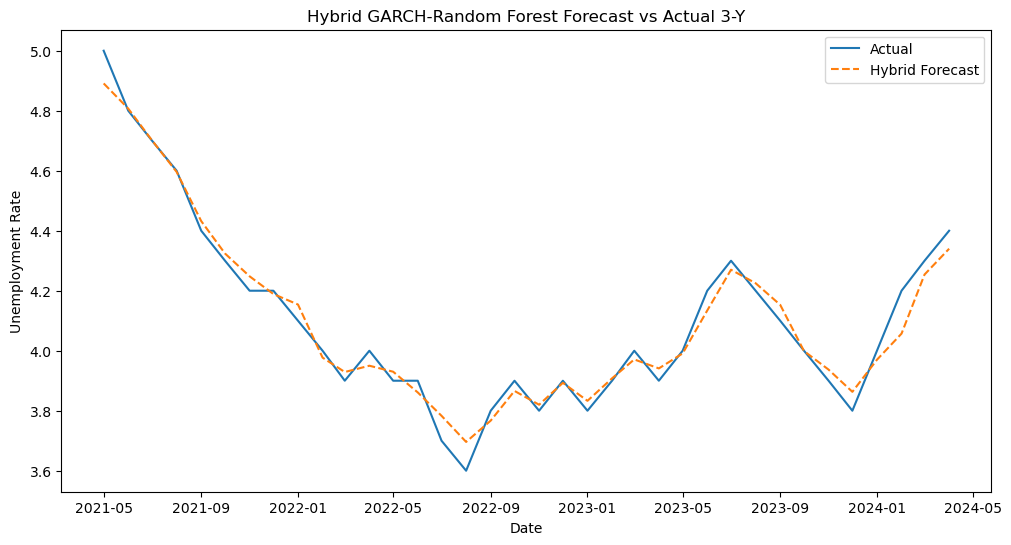

Hybrid Model RMSE: 0.0496733776226707
Hybrid Model MAE: 0.039111111111111097
Mean Squared Error: 0.0024674444444444422
Hybrid Model MAPE: 0.009607415783762814


In [89]:
# Splitting the data
forecast_period = 4 * 12  # 4 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# GARCH model fitting
garch_model = arch_model(train[target], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
garch_forecast = garch_fit.forecast(horizon=len(test))
garch_forecast_mean = garch_forecast.mean.iloc[-1].values

# Calculate residuals
residuals = test[target].values - garch_forecast_mean

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.reshape(-1, 1))

# Create sequences for Random Forest
time_step = 12
X_rf, y_rf = [], []
for i in range(time_step, len(scaled_residuals)):
    X_rf.append(scaled_residuals[i-time_step:i, 0])
    y_rf.append(scaled_residuals[i, 0])

X_rf, y_rf = np.array(X_rf), np.array(y_rf)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# Predict residuals using Random Forest model
predicted_residuals = rf_model.predict(X_rf)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the GARCH forecast and predicted residuals
garch_forecast_aligned = garch_forecast_mean[time_step:]

# Combine GARCH forecast and Random Forest predicted residuals
actual_values = test[target][time_step:]
hybrid_forecast = garch_forecast_aligned + predicted_residuals

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle='--')
plt.legend()
plt.title('Hybrid GARCH-Random Forest Forecast vs Actual 3-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('GARCH-RF-3Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

# GARCH + RF 1-Year Forecast

Iteration:      1,   Func. Count:      6,   Neg. LLF: 161683413972.74792
Iteration:      2,   Func. Count:     13,   Neg. LLF: 143512487.86201614
Iteration:      3,   Func. Count:     19,   Neg. LLF: 714.6678763719038
Iteration:      4,   Func. Count:     26,   Neg. LLF: 29070.48495400284
Iteration:      5,   Func. Count:     32,   Neg. LLF: 366.06097809973335
Iteration:      6,   Func. Count:     38,   Neg. LLF: 10127.607089904486
Iteration:      7,   Func. Count:     44,   Neg. LLF: 303.3941193900288
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1365.803592919907
Iteration:      9,   Func. Count:     56,   Neg. LLF: 298.6029868828517
Iteration:     10,   Func. Count:     62,   Neg. LLF: 251.0048084196917
Iteration:     11,   Func. Count:     68,   Neg. LLF: 246.70473994712728
Iteration:     12,   Func. Count:     74,   Neg. LLF: 281.2573768434212
Iteration:     13,   Func. Count:     80,   Neg. LLF: 228.96614854472
Iteration:     14,   Func. Count:     85,   Neg. LLF: 674.838

RandomForestRegressor(random_state=42)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid GARCH-Random Forest Forecast vs Actual 3-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

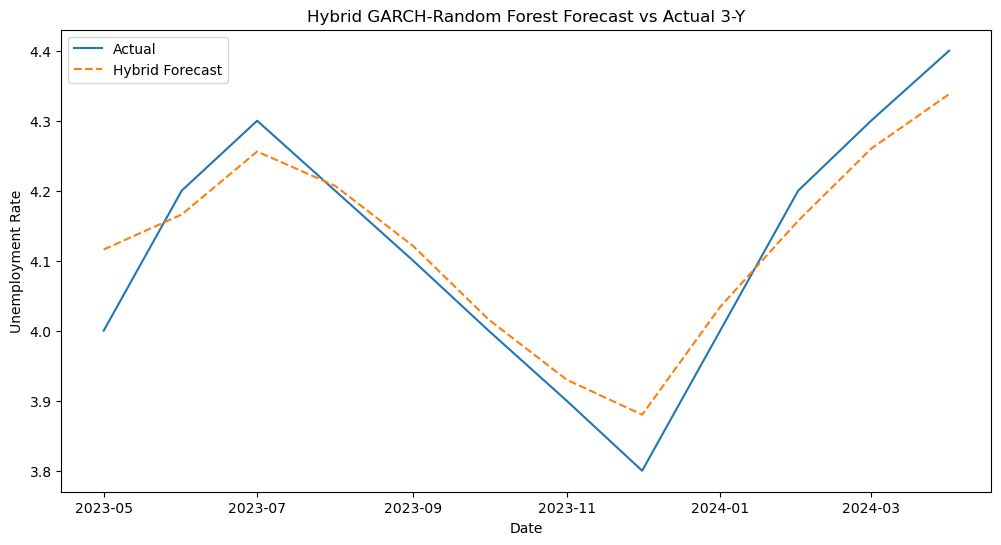

Hybrid Model RMSE: 0.05247459702878447
Hybrid Model MAE: 0.04391666666666649
Mean Squared Error: 0.0027535833333333162
Hybrid Model MAPE: 0.010749390275217173


In [87]:
# Splitting the data
forecast_period = 2 * 12  # 4 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# GARCH model fitting
garch_model = arch_model(train[target], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
garch_forecast = garch_fit.forecast(horizon=len(test))
garch_forecast_mean = garch_forecast.mean.iloc[-1].values

# Calculate residuals
residuals = test[target].values - garch_forecast_mean

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.reshape(-1, 1))

# Create sequences for Random Forest
time_step = 12
X_rf, y_rf = [], []
for i in range(time_step, len(scaled_residuals)):
    X_rf.append(scaled_residuals[i-time_step:i, 0])
    y_rf.append(scaled_residuals[i, 0])

X_rf, y_rf = np.array(X_rf), np.array(y_rf)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

# Predict residuals using Random Forest model
predicted_residuals = rf_model.predict(X_rf)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the GARCH forecast and predicted residuals
garch_forecast_aligned = garch_forecast_mean[time_step:]

# Combine GARCH forecast and Random Forest predicted residuals
actual_values = test[target][time_step:]
hybrid_forecast = garch_forecast_aligned + predicted_residuals

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle='--')
plt.legend()
plt.title('Hybrid GARCH-Random Forest Forecast vs Actual 3-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('GARCH-RF-1Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

# GARCH - SVR 3-Year Forecast

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1197.9853621495129
Iteration:      2,   Func. Count:     14,   Neg. LLF: 349901832.4202478
Iteration:      3,   Func. Count:     20,   Neg. LLF: 228.794796953578
Iteration:      4,   Func. Count:     25,   Neg. LLF: 491.27560867891526
Iteration:      5,   Func. Count:     31,   Neg. LLF: 531.4805817618294
Iteration:      6,   Func. Count:     44,   Neg. LLF: 227.2321090504924
Iteration:      7,   Func. Count:     50,   Neg. LLF: 242.1429760225675
Iteration:      8,   Func. Count:     57,   Neg. LLF: 233.0673884775485
Iteration:      9,   Func. Count:     63,   Neg. LLF: 212.0319668550746
Iteration:     10,   Func. Count:     68,   Neg. LLF: 211.95125681249354
Iteration:     11,   Func. Count:     73,   Neg. LLF: 211.85875202697457
Iteration:     12,   Func. Count:     78,   Neg. LLF: 211.82059857595655
Iteration:     13,   Func. Count:     83,   Neg. LLF: 211.8062980213244
Iteration:     14,   Func. Count:     88,   Neg. LLF: 211.80

SVR()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid GARCH-SVR Forecast vs Actual 1-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

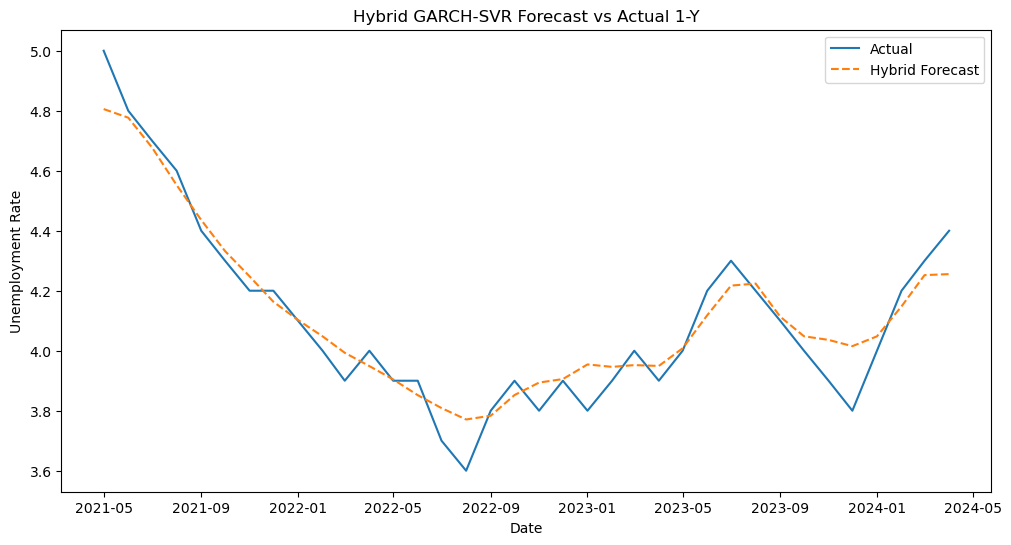

Hybrid Model RMSE: 0.08431133774577443
Hybrid Model MAE: 0.06476924590655428
Mean Squared Error: 0.007108401672482047
Hybrid Model MAPE: 0.015997904554332837


In [92]:
# Splitting the data
forecast_period = 4 * 12  # 4 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# GARCH model fitting
garch_model = arch_model(train[target], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
garch_forecast = garch_fit.forecast(horizon=len(test))
garch_forecast_mean = garch_forecast.mean.iloc[-1].values

# Calculate residuals
residuals = test[target].values - garch_forecast_mean

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.reshape(-1, 1))

# Create sequences for SVR
time_step = 12
X_svr, y_svr = [], []
for i in range(time_step, len(scaled_residuals)):
    X_svr.append(scaled_residuals[i-time_step:i, 0])
    y_svr.append(scaled_residuals[i, 0])

X_svr, y_svr = np.array(X_svr), np.array(y_svr)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_svr, y_svr)

# Predict residuals using SVR model
predicted_residuals = svr_model.predict(X_svr)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the GARCH forecast and predicted residuals
garch_forecast_aligned = garch_forecast_mean[time_step:]

# Combine GARCH forecast and Random Forest predicted residuals
hybrid_forecast = garch_forecast_aligned + predicted_residuals
actual_values = test[target].values[time_step:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle = '--')
plt.legend()
plt.title('Hybrid GARCH-SVR Forecast vs Actual 1-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('GARCH-SVR-3Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

# GARCH - SVR 1-Year Forecast

Iteration:      1,   Func. Count:      6,   Neg. LLF: 161683413972.74792
Iteration:      2,   Func. Count:     13,   Neg. LLF: 143512487.86201614
Iteration:      3,   Func. Count:     19,   Neg. LLF: 714.6678763719038
Iteration:      4,   Func. Count:     26,   Neg. LLF: 29070.48495400284
Iteration:      5,   Func. Count:     32,   Neg. LLF: 366.06097809973335
Iteration:      6,   Func. Count:     38,   Neg. LLF: 10127.607089904486
Iteration:      7,   Func. Count:     44,   Neg. LLF: 303.3941193900288
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1365.803592919907
Iteration:      9,   Func. Count:     56,   Neg. LLF: 298.6029868828517
Iteration:     10,   Func. Count:     62,   Neg. LLF: 251.0048084196917
Iteration:     11,   Func. Count:     68,   Neg. LLF: 246.70473994712728
Iteration:     12,   Func. Count:     74,   Neg. LLF: 281.2573768434212
Iteration:     13,   Func. Count:     80,   Neg. LLF: 228.96614854472
Iteration:     14,   Func. Count:     85,   Neg. LLF: 674.838

SVR()

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Hybrid GARCH-SVR Forecast vs Actual 1-Y')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

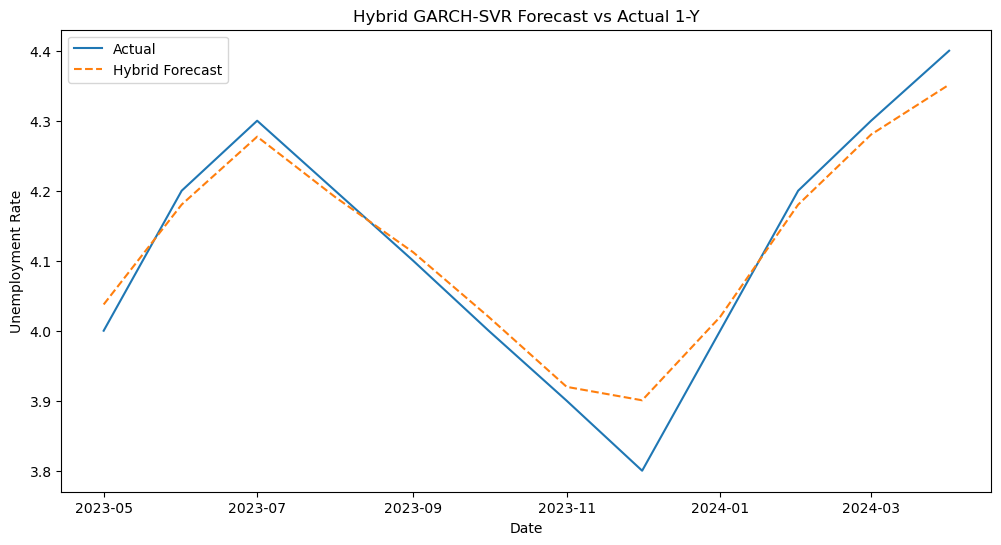

Hybrid Model RMSE: 0.0376033695537073
Hybrid Model MAE: 0.0290962295398088
Mean Squared Error: 0.001414013401792681
Hybrid Model MAPE: 0.007187029040021547


In [91]:
# Splitting the data
forecast_period = 2 * 12  # 4 years monthly data
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# GARCH model fitting
garch_model = arch_model(train[target], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()
garch_forecast = garch_fit.forecast(horizon=len(test))
garch_forecast_mean = garch_forecast.mean.iloc[-1].values

# Calculate residuals
residuals = test[target].values - garch_forecast_mean

# Scale residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(residuals.reshape(-1, 1))

# Create sequences for SVR
time_step = 12
X_svr, y_svr = [], []
for i in range(time_step, len(scaled_residuals)):
    X_svr.append(scaled_residuals[i-time_step:i, 0])
    y_svr.append(scaled_residuals[i, 0])

X_svr, y_svr = np.array(X_svr), np.array(y_svr)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_svr, y_svr)

# Predict residuals using SVR model
predicted_residuals = svr_model.predict(X_svr)
predicted_residuals = scaler.inverse_transform(predicted_residuals.reshape(-1, 1)).flatten()

# Align the lengths of the GARCH forecast and predicted residuals
garch_forecast_aligned = garch_forecast_mean[time_step:]

# Combine GARCH forecast and Random Forest predicted residuals
hybrid_forecast = garch_forecast_aligned + predicted_residuals
actual_values = test[target].values[time_step:]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test.index[time_step:], test[target][time_step:], label='Actual')
plt.plot(test.index[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle = '--')
plt.legend()
plt.title('Hybrid GARCH-SVR Forecast vs Actual 1-Y')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.savefig('GARCH-SVR-1Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')

# ARIMAX - LSTM 3- Year

                               SARIMAX Results                                
Dep. Variable:       UnemploymentRate   No. Observations:                  160
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 156.814
Date:                Sun, 04 Aug 2024   AIC                           -301.627
Time:                        13:47:47   BIC                           -283.214
Sample:                    01-01-2007   HQIC                          -294.150
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gdp_lag             -0.0003      0.006     -0.052      0.959      -0.013       0.012
inflation_lag        0.0036      0.023      0.154      0.878      -0.042       0.050
unemployment_lag     0.0673 

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 10)              │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,381 (5.39 KB)

 Trainable params: 1,381 (5.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.1682
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1431 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1198
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1026 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0888
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0743
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0633
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0540
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0469
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0398 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0352 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0306
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0285
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0257
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0251
Epoch 16/50
2/2 ━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

Text(0.5, 1.0, 'Hybrid ARIMAX-LSTM Forecast vs Actual')

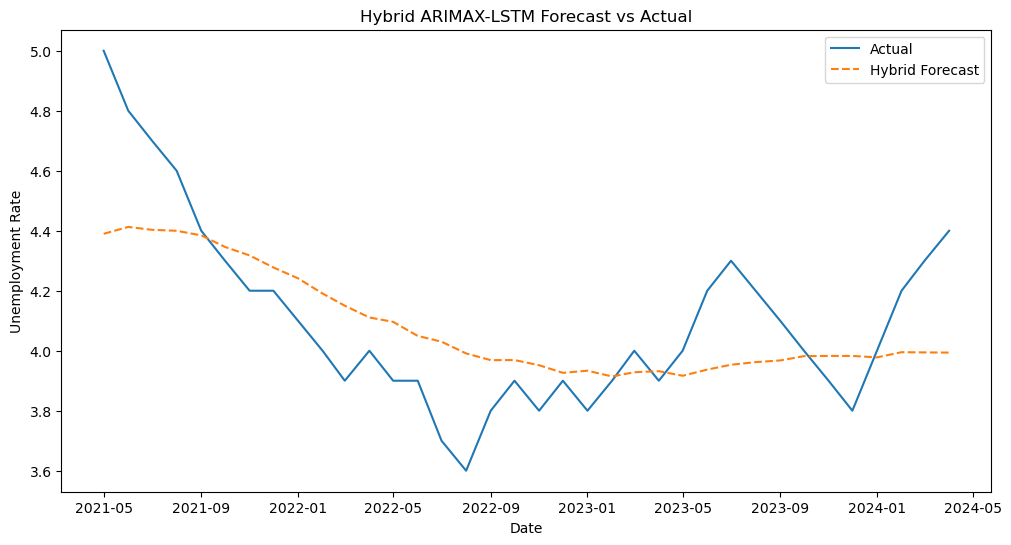

Hybrid Model RMSE: 0.22482943748422676
Hybrid Model MAE: 0.17953716651451584
Mean Squared Error: 0.05054827595947383
Hybrid Model MAPE: 0.04301692338636771


In [79]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Split data into train and test sets
forecast_period = 4 * 12
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

train = train.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)


target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit ARIMAX model
arima_order = (2, 1, 0)
arima_model = ARIMA(train[target], order=arima_order, exog=train[features])
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecast and calculate residuals
arima_forecast = arima_fit.forecast(steps=len(test), exog=test[features])
residuals = test[target] - arima_forecast
# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))

# Prepare the data for LSTM
time_step = 12
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

train_dates = merged_df.index[:train_size]
test_dates = merged_df.index[train_size:]

# Define LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

tf.keras.backend.clear_session()

# Predict residuals using LSTM model
# Make sure to use the same shape for prediction as used for training
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the ARIMA forecast and predicted residuals
arima_forecast = arima_forecast[time_step:]

# Combine ARIMA forecast and LSTM predicted residuals
forecast_dates = test_dates[time_step:] 
actual_values = test[target][time_step:]
hybrid_forecast = arima_forecast.values + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_dates[time_step:], actual_values, label='Actual')
plt.plot(test_dates[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Hybrid ARIMAX-LSTM Forecast vs Actual')
plt.legend()
plt.savefig('ARIMAX-LSTM-3Y.png')
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')


# ARIMA -LSTM 1 -Year

                               SARIMAX Results                                
Dep. Variable:       UnemploymentRate   No. Observations:                  184
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 175.609
Date:                Sun, 04 Aug 2024   AIC                           -339.217
Time:                        14:24:44   BIC                           -319.960
Sample:                    01-01-2007   HQIC                          -331.411
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gdp_lag              0.0004      0.002      0.173      0.863      -0.004       0.005
inflation_lag       -0.0022      0.019     -0.114      0.909      -0.040       0.036
unemployment_lag     0.0901 

C:\Users\maxsh\anaconda31\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 10)              │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,381 (5.39 KB)

 Trainable params: 1,381 (5.39 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.3115
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2944
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2776
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2610
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2448
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2288
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2133
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1981
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1835
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1693
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1557
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1428
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1305
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1189
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.1082
Epoch 16/50
1/1 ━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Unemployment Rate')

Text(0.5, 1.0, 'Hybrid ARIMAX-LSTM Forecast vs Actual')

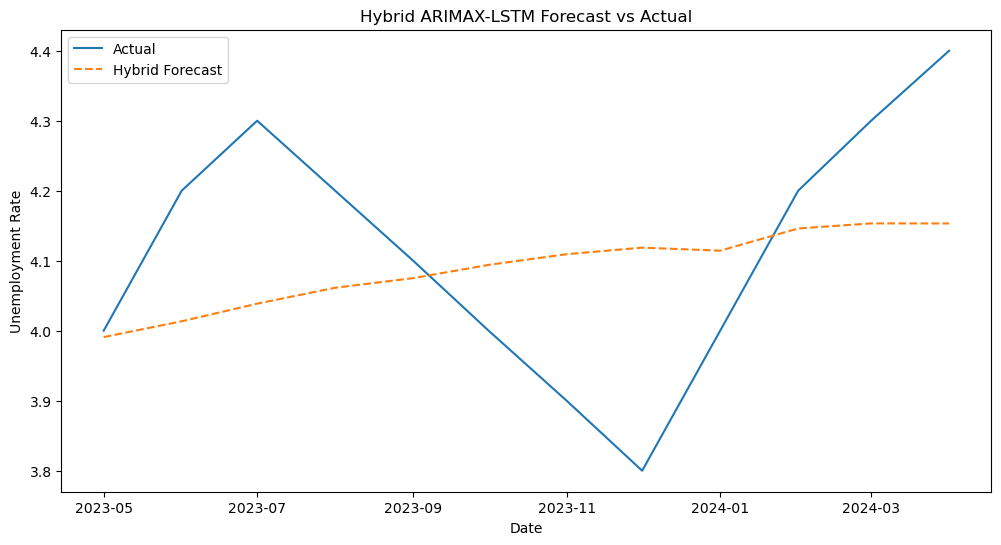

Hybrid Model RMSE: 0.1769259102019045
Hybrid Model MAE: 0.15035904767060024
Mean Squared Error: 0.03130277770077238
Hybrid Model MAPE: 0.03660188038939643


In [93]:
# Split data into train and test sets
forecast_period = 2 * 12
train_size = len(merged_df) - forecast_period
train, test = merged_df[:train_size], merged_df[train_size:]

train = train.apply(pd.to_numeric)
test = test.apply(pd.to_numeric)


target = 'UnemploymentRate'
features = ['gdp_lag', 'inflation_lag', 'unemployment_lag']

# Fit ARIMAX model
arima_order = (2, 1, 0)
arima_model = ARIMA(train[target], order=arima_order, exog=train[features])
arima_fit = arima_model.fit()
print(arima_fit.summary())

# Forecast and calculate residuals
arima_forecast = arima_fit.forecast(steps=len(test), exog=test[features])
residuals = test[target] - arima_forecast
# Normalize residuals
scaler_residuals = MinMaxScaler(feature_range=(0, 1))
scaled_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))

# Prepare the data for LSTM
time_step = 12
X, y = [], []
for i in range(time_step, len(scaled_residuals)):
    X.append(scaled_residuals[i-time_step:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)

train_dates = merged_df.index[:train_size]
test_dates = merged_df.index[train_size:]

# Define LSTM model
model = Sequential()
model.add(LSTM(10, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(10, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

tf.keras.backend.clear_session()

# Predict residuals using LSTM model
# Make sure to use the same shape for prediction as used for training
predicted_residuals = model.predict(X)
predicted_residuals = scaler_residuals.inverse_transform(predicted_residuals)

# Align the lengths of the ARIMA forecast and predicted residuals
arima_forecast = arima_forecast[time_step:]

# Combine ARIMA forecast and LSTM predicted residuals
forecast_dates = test_dates[time_step:] 
actual_values = test[target][time_step:]
hybrid_forecast = arima_forecast.values + predicted_residuals.flatten()

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_dates[time_step:], actual_values, label='Actual')
plt.plot(test_dates[time_step:], hybrid_forecast, label='Hybrid Forecast', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Hybrid ARIMAX-LSTM Forecast vs Actual')
plt.legend()
plt.savefig('ARIMAX-LSTM-1Y.png')
plt.show();

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, hybrid_forecast))
print(f'Hybrid Model RMSE: {rmse}')

mae = mean_absolute_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAE: {mae}')

mse = mean_squared_error(actual_values, hybrid_forecast)
print(f'Mean Squared Error: {mse}')

mape = mean_absolute_percentage_error(actual_values, hybrid_forecast)
print(f'Hybrid Model MAPE: {mape}')